In [3]:
import numpy as np
import pandas as pd
df = pd.read_csv('marketing_data.csv')
print(df)
pd.set_option('display.max_rows', 3)

         ID  Year_Birth   Education Marital_Status       Income  Kidhome  \
0      1826        1970  Graduation       Divorced  $84,835.00         0   
1         1        1961  Graduation         Single  $57,091.00         0   
2     10476        1958  Graduation        Married  $67,267.00         0   
3      1386        1967  Graduation       Together  $32,474.00         1   
4      5371        1989  Graduation         Single  $21,474.00         1   
...     ...         ...         ...            ...          ...      ...   
2235  10142        1976         PhD       Divorced  $66,476.00         0   
2236   5263        1977    2n Cycle        Married  $31,056.00         1   
2237     22        1976  Graduation       Divorced  $46,310.00         1   
2238    528        1978  Graduation        Married  $65,819.00         0   
2239   4070        1969         PhD        Married  $94,871.00         0   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumStorePurchases  \
0            0

In [4]:
#SECTION ONE
# 1)Are there any null values or outliers? How will you wrangle/handle them?
# 2) Are there any variables that warrant transformations?

# SOLUTION
#checking for null_values
null_values = df.isnull().sum()
#count null values for eachn column
print(null_values)
#as shown there are 24 null values in the Income Column

ID         0
          ..
Country    0
Length: 28, dtype: int64


In [12]:
# to take care of the null values we are replacing the income null values with 0 and changing it's datatype
#from string to numerical
df['Income']= df['Income'].fillna(0)
df['Income'] = df['Income'].replace('[\$,]', '', regex=True).astype(float)
null_values = df.isnull().sum()
print(null_values)

#another variable that warrants transformation is the date customer joined
#we'll be changing to the correct format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
pd.set_option('display.max_rows', None)
#as shown there are no more null values

ID         0
          ..
Country    0
Length: 28, dtype: int64


C:\Users\DELL\AppData\Local\Temp\ipykernel_6156\384368800.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])


In [13]:
#checking for outliers in numerical columns
#selecting all numerical columns and putting in list
numerical_columns = df.select_dtypes(include='number').columns.tolist()
print(numerical_columns)

def check_out(column_list):
    for col in column_list:
#         iterate through list of numerical columns and sort each column in ascending order
#         and turn sorted column to list
        sorted_col = df[col].sort_values(ascending=True).tolist()
        print("{},{}\n".format(col, sorted_col))

check_out(numerical_columns)


['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain']
ID,[0, 1, 9, 13, 17, 20, 22, 24, 25, 35, 48, 49, 55, 67, 73, 75, 78, 87, 89, 92, 113, 115, 123, 125, 143, 146, 153, 158, 164, 175, 176, 178, 182, 193, 194, 195, 199, 202, 203, 213, 217, 221, 231, 232, 234, 236, 238, 241, 246, 247, 252, 254, 255, 257, 263, 269, 271, 273, 274, 286, 291, 295, 304, 309, 310, 313, 322, 326, 332, 339, 340, 347, 359, 361, 367, 368, 375, 378, 380, 387, 405, 425, 433, 437, 448, 450, 451, 453, 454, 455, 456, 460, 466, 477, 486, 492, 498, 500, 503, 520, 521, 523, 524, 528, 531, 535, 538, 544, 550, 564, 569, 574, 577, 590, 591, 606, 607, 610, 615, 618, 624, 626, 635, 640, 641, 642, 663, 675, 679, 6

In [14]:
#upon observation, there are outliers in year of birth and Income(as nobody born in 1893 is alive now and nobody that earns $0
#can afford to make purchases)
#to get rid of the outliers we find the interquartile range by dividing the data into four equal parts(quartiles)
# and take out the first quartile and last quartile leaving us with range of data gives the most reliable information)
#then working with that data

#to do that, we sort the data by any one of the columns that had outliers
# (i'm using income)
df_sort = df.sort_values(by='Income')
#sorting df by income
Income_list = df_sort['Income'].tolist()
#taking income column from df and turning into list
#divide into four parts and calculate number of outliers
num_of_outliers = int((len(Income_list) - 3)/4)
#define interquartile range for income list by taking out outliers from both sides
inter_range = Income_list[num_of_outliers:len(Income_list)-num_of_outliers]
print(inter_range)

[34704.0, 34728.0, 34738.0, 34824.0, 34824.0, 34838.0, 34853.0, 34916.0, 34935.0, 34935.0, 34941.0, 34961.0, 34968.0, 34984.0, 35178.0, 35178.0, 35196.0, 35196.0, 35246.0, 35322.0, 35340.0, 35388.0, 35416.0, 35441.0, 35523.0, 35544.0, 35641.0, 35682.0, 35684.0, 35688.0, 35688.0, 35701.0, 35704.0, 35765.0, 35788.0, 35790.0, 35791.0, 35791.0, 35797.0, 35860.0, 35860.0, 35860.0, 35860.0, 35876.0, 35893.0, 35924.0, 35946.0, 36026.0, 36038.0, 36065.0, 36075.0, 36108.0, 36130.0, 36138.0, 36143.0, 36145.0, 36230.0, 36262.0, 36273.0, 36283.0, 36301.0, 36317.0, 36408.0, 36443.0, 36550.0, 36627.0, 36634.0, 36640.0, 36663.0, 36715.0, 36732.0, 36736.0, 36778.0, 36781.0, 36790.0, 36802.0, 36807.0, 36864.0, 36921.0, 36927.0, 36930.0, 36947.0, 36957.0, 36959.0, 36975.0, 36997.0, 37040.0, 37054.0, 37070.0, 37070.0, 37085.0, 37087.0, 37126.0, 37150.0, 37155.0, 37235.0, 37244.0, 37284.0, 37284.0, 37292.0, 37334.0, 37368.0, 37395.0, 37401.0, 37401.0, 37406.0, 37509.0, 37633.0, 37697.0, 37697.0, 37716.0, 

In [16]:
#filtering dataframe based on newly derived inter-quartile range where all income less than the first
#value of the interquartile range and income greater than the last value of the inter quartile range 
#are filtered out
filtered_df = df_sort[(df_sort['Income'] >= inter_range[0]) & (df_sort['Income'] <= inter_range[len(inter_range)-1])]
print(filtered_df)


         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
1482   4706        1966  Graduation         Single  34704.0        0   
65     6287        1986  Graduation       Together  34728.0        1   
1147   9467        1984  Graduation         Single  34738.0        1   
1468   5184        1995  Graduation         Single  34824.0        0   
1467   8315        1995  Graduation         Single  34824.0        0   
1412    236        1951  Graduation        Married  34838.0        1   
1692    274        1973  Graduation         Single  34853.0        1   
2014   1404        1968  Graduation       Together  34916.0        2   
1603   8175        1992  Graduation        Married  34935.0        0   
1602   3386        1992  Graduation        Married  34935.0        0   
605    7458        1956      Master       Together  34941.0        1   
1725   5287        1973  Graduation        Married  34961.0        1   
273    5892        1980  Graduation        Married  34968.0     

In [19]:
#checking for outliers in the categorical columns
categorical_columns = filtered_df.select_dtypes(include='object',exclude= 'datetime64').columns.tolist()
print(categorical_columns)

def check(column_list):
    for col in column_list:
        row_count = filtered_df[col].value_counts()
        print(row_count)
#         iterate through list of categorical columns and check for columns that have less than or equals two rows
  

check(categorical_columns)
#deleting outlier columns
filtered_df = filtered_df[(filtered_df['Marital_Status'] != 'Alone') & (filtered_df['Marital_Status'] != 'Absurd') &
                         (filtered_df['Marital_Status'] != 'YOLO')]
print(filtered_df['Marital_Status'].value_counts())


['Education', 'Marital_Status', 'Country']
Education
Graduation    537
PhD           276
Master        211
2n Cycle       93
Name: count, dtype: int64
Marital_Status
Married     438
Together    286
Single      222
Divorced    126
Widow        45
Name: count, dtype: int64
Country
SP     536
SA     180
CA     130
AUS     76
IND     76
US      64
GER     53
ME       2
Name: count, dtype: int64
Marital_Status
Married     438
Together    286
Single      222
Divorced    126
Widow        45
Name: count, dtype: int64


In [64]:
# 3)Are there any useful variables that you can engineer with the given data?

# SOLUTION
#   Useful Variables that can be engineered from the data are given as follows:

#i) ENGAGEMENT METRICS(measure of level of audience engagement with content)

#they are further categorised as:
#a) Number of people that accepted the offer for each campaign
cmp_one = filtered_df['AcceptedCmp1'].sum()
cmp_two = filtered_df['AcceptedCmp2'].sum()
cmp_three = filtered_df['AcceptedCmp3'].sum()
cmp_four = filtered_df['AcceptedCmp4'].sum()
cmp_five = filtered_df['AcceptedCmp5'].sum()
cmp_last = filtered_df['Response'].sum()

#b) total amount of people that accepted the campaign offers
filtered_df['total_engagement'] = (filtered_df['AcceptedCmp1'] + filtered_df['AcceptedCmp2'] + 
                               filtered_df['AcceptedCmp3'] + filtered_df['AcceptedCmp4'] + filtered_df['AcceptedCmp5'] 
                                + filtered_df['Response'] )
print(cmp_one,cmp_two,cmp_three,cmp_four,cmp_five,cmp_last)

#c)total percent of customers that accepted the offer compared to the total number of customers each year
#change to date format
# filtered_df['Date'] = pd.to_datetime(filtered_df['Dt_Customer'])
#extract the year
filtered_df['Year'] = filtered_df['Dt_Customer'].dt.year
sum_by_year_percent = filtered_df.groupby('Year').agg({
                                               'AcceptedCmp1': lambda x: sum(x != 0) *100 / len(x), 
                                               'AcceptedCmp2': lambda x: sum(x != 0) * 100 / len(x),
                                               'AcceptedCmp3': lambda x: sum(x != 0) * 100/ len(x),
                                                'AcceptedCmp4': lambda x: sum(x != 0)* 100 / len(x),
                                                'AcceptedCmp5': lambda x: sum(x != 0) * 100/ len(x),
                                                'Response': lambda x: sum(x != 0)*100 / len(x)}).reset_index()
 
print(sum_by_year_percent)


#ii)CUSTOMER AND PRODUCT VALUE(how much profit customers and products bring in)

#they are further categorised as:

#a)most profittable customer
filtered_df['total_profit'] = (filtered_df['MntFishProducts'] + filtered_df['MntMeatProducts'] + 
                               filtered_df['MntSweetProducts'] + filtered_df['MntWines'] + filtered_df['MntFruits'] 
                                + filtered_df['MntGoldProds'] )
top_most_profitable_customer = filtered_df.sort_values(by='total_profit', ascending=False)[['total_profit']].iloc[1:10].reset_index()
top_most_profitable_customer['index'] = top_most_profitable_customer['index'].astype(str)
print(top_most_profitable_customer)

#b)most profittable product
fish = filtered_df['MntFishProducts'].sum()
meat = filtered_df['MntMeatProducts'].sum()
sweet = filtered_df['MntSweetProducts'].sum()
wines = filtered_df['MntWines'].sum()
fruits = filtered_df['MntFruits'].sum()
gold = filtered_df['MntGoldProds'].sum()
print(fish,meat,sweet,wines,fruits,gold)


#iii)SEGMENTATION VARIABLES (grouping customers based on different varaibles for targeted marketing)
#this is further broken down to:

#a)segmentation by age and children at home
#b)segmenation by country
#c)segmenation by income

#getting age of each customer
filtered_df['Age'] = filtered_df['Year_Birth'].apply(lambda x: 2023 - x)
bins_age = [20, 30, 40, 50, 60, 70,80,90]
labels_age = ['20s', '30s', '40s', '50s', '60s', '70s', '80s']
bins_inc = [20000, 40000, 60000, 80000]
labels_inc = ['20k-39k','40k-59k','60k&above']
#sectioning each age into age groups
filtered_df['age_group'] = pd.cut(filtered_df['Age'], bins=bins_age, labels=labels_age, right=False)
#segmentation based on age, kids and teens,country and income
filtered_df['income_group'] = pd.cut(filtered_df['Income'], bins=bins_inc, labels=labels_inc, right=False)
by_age = filtered_df.groupby('age_group').agg({'total_profit':'mean', 'total_engagement': 'sum',
                                                                         'Age' : 'count'}).reset_index().rename(columns={'Age': 'Count'})

by_Teenhome = filtered_df.groupby('Teenhome').agg({'total_profit': 'mean', 'total_engagement':'sum'
                                                         ,'ID':'count'}).reset_index().rename(columns={'ID': 'Count'})

by_Kidhome = filtered_df.groupby('Kidhome').agg({'total_profit': 'mean', 'total_engagement':'sum'
                                                         ,'ID':'count'}).reset_index().rename(columns={'ID': 'Count'})


by_country = filtered_df.groupby('Country').agg({'total_profit': 'mean', 
                                                     'total_engagement':'sum','ID':'count'}).reset_index().rename(columns={'ID': 'Count'})


by_income = filtered_df.groupby('income_group').agg({'total_profit': 'mean', 'total_engagement':'sum'
                                                         ,'Income':'count'}).reset_index().rename(columns={'Income': 'Count'})

print(by_age)
print(by_country)
print(by_Kidhome)
print(by_Teenhome)
print(by_income)

#iv)CUSTOMER SATISFACTION(gauges customer satisfaction)
complain_rate_overtime =  filtered_df.groupby('Year')['Complain'].agg(lambda x: sum(x != 0) / len(x)).reset_index()
print(complain_rate_overtime)

#v)ATTRIBUTION MODELS(which channels are the most successsful)
#channel with highest purchases
discount = filtered_df['NumDealsPurchases'].sum()
store = filtered_df['NumStorePurchases'].sum()
web = filtered_df['NumWebPurchases'].sum()
catalog = filtered_df['NumCatalogPurchases'].sum()


# vi) CLICKTHROUGHRATE(number of times an action was taken / number of impressions)
filtered_df['ClickThroughRate'] = (filtered_df['NumWebPurchases']/filtered_df['NumWebVisitsMonth'])*100
# ctr_by_income = filtered_df.groupby('Teenhome').agg({'ClickThroughRate':'mean'}).fillna(0).reset_index()
ctr_by_age = filtered_df.groupby(['age_group']).agg({'ClickThroughRate':'mean'}).fillna(0).reset_index()
ctr_by_income = filtered_df.groupby(['income_group','Teenhome','Kidhome']).agg({'ClickThroughRate':'mean'}).fillna(0).reset_index()

print(ctr_by_age)



#vii) CHURN RATE(measure the percentage of customers 
#who stop using a product or service over a specific period of time.)
churn_period = 40
# customers that haven't returned in the last forty days
filtered_df['churned_customers'] = filtered_df['Recency'].apply(lambda x: 1 if x > churn_period else 0)
#finding how many customers of the total amount of customers that join each year, are still active customers
churn_rate = filtered_df.groupby('Year')['churned_customers'].agg(lambda x: sum(x != 0) / len(x)).reset_index()
print(churn_rate)






21 14 78 86 9 128
   Year  AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
0  2012      0.000000      2.008032      6.827309     10.843373      1.204819   
1  2013      1.655629      0.827815      6.788079      5.960265      0.496689   
2  2014      4.166667      1.515152      7.575758      8.712121      1.136364   

    Response  
0  22.489960  
1   9.437086  
2   5.681818  
  index  total_profit
0  2037          2126
1   476          1895
2  1003          1829
3  1193          1826
4   924          1820
5   410          1804
6  1685          1797
7  1596          1750
8   444          1722
29212 113902 20330 308296 21278 47993
  age_group  total_profit  total_engagement  Count
0       20s     23.000000                 0      2
1       30s    526.057143                22     70
2       40s    436.191176                70    272
3       50s    466.619718               117    355
4       60s    538.225564                84    266
5       70s    501.179310        

Text(0, 0.5, 'CTR')

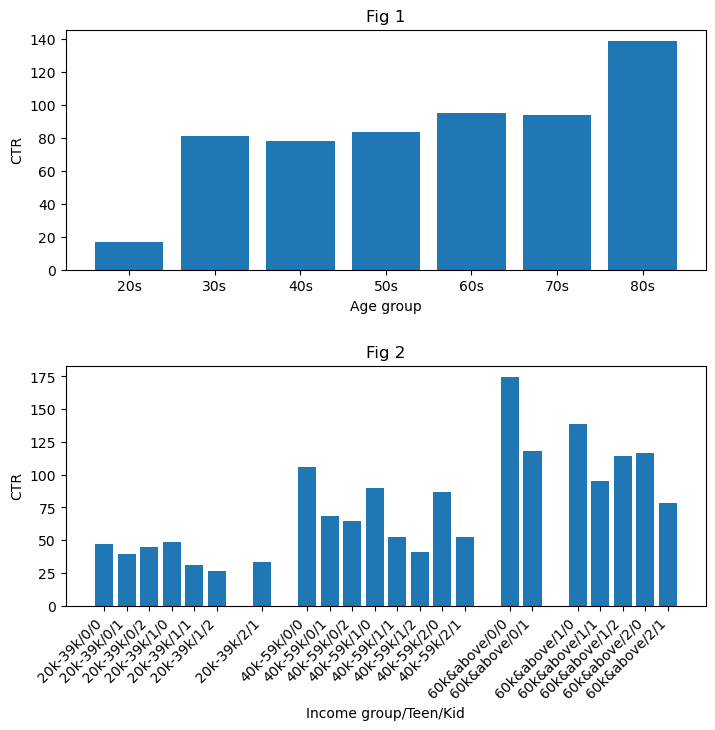

In [77]:
#4) Do you notice any patterns or anomalies in the data, can you plot them?

import matplotlib.pyplot as plt
%matplotlib inline

# SOLUTION
# i)Click through rate visualization
fig = plt.figure()
axes1 = fig.add_axes([0,1.2,1,0.5])
axes2 = fig.add_axes([0,0.5,1,0.5])
axes1.bar(ctr_by_age['age_group'],ctr_by_age['ClickThroughRate'])
axes1.set_title('Fig 1')
axes1.set_xlabel('Age group')
axes1.set_ylabel('CTR')

#Extracting the non zero values for ctr_by_income for better visulaization
non_zero = ctr_by_income[ctr_by_income['ClickThroughRate'] != 0]

axes2.bar(non_zero.index, non_zero['ClickThroughRate'])
combined_series = non_zero['income_group'].astype(str) + '/' + non_zero['Teenhome'].astype(str)+ '/' + non_zero['Kidhome'].astype(str)
axes2.set_xticks(non_zero.index, combined_series, rotation = 45, ha = 'right');
axes2.set_title('Fig 2')
axes2.set_xlabel('Income group/Teen/Kid')
axes2.set_ylabel('CTR')
#upon observation, we can see click through rate is approximately the same except with customers in their 20s and 80s
#who are on the extremes. while the customers in their 20's make less than 2 purchase per 5 web visits, customers
#in their 80s make over 5 purchases per 5 website visits
#we also see click through rate tends to increase with an increase in income and people with the highest click through rates
#per increase in Income range typically have no kids and no teens and we can imply have no responsibitlites


Text(0.5, 1.0, 'Fig 3')

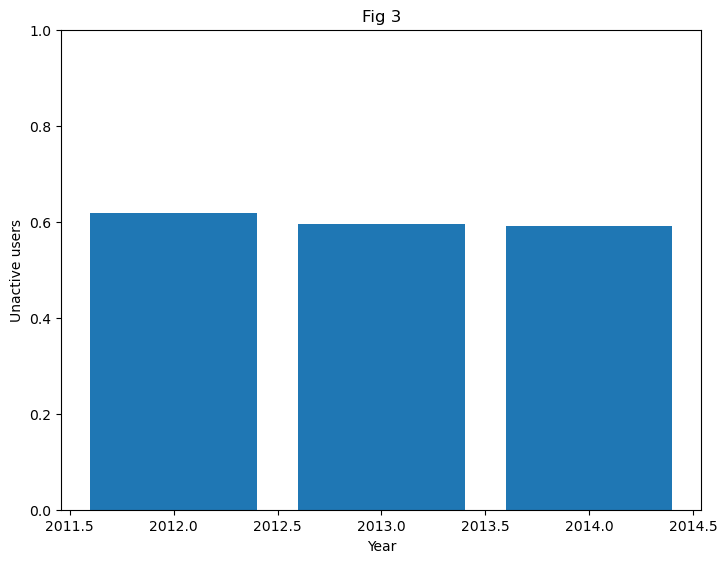

In [643]:
# ii)
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.bar(churn_rate['Year'], churn_rate['churned_customers'])
axes.set_ylim(0, 1)
axes.set_xlabel('Year')
axes.set_ylabel('Unactive users')
axes.set_title('Fig 3')
#shows 61%, 59% and 59% of the total amount of people that joined in 2012, 2013 and 2014 respectively are
#no longer active users


Text(0.5, 1.0, 'Fig 4')

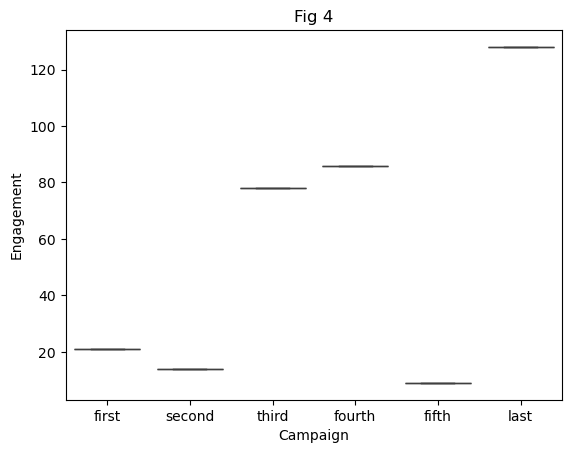

In [26]:
# iii)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
campaign = np.array(['first', 'second', 'third', 'fourth', 'fifth', 'last'])
engagement = np.array([cmp_one, cmp_two, cmp_three, cmp_four, cmp_five, cmp_last])
engage_df = pd.DataFrame({'Campaign': campaign, 'Engagement': engagement})

sns.boxplot(x='Campaign', y='Engagement', data=engage_df)
plt.title("Fig 4")
#the last camoaign had the most accepted offers while the fifth campain had the least accepted offers
                     

Text(0.5, 1.0, 'Fig 5')

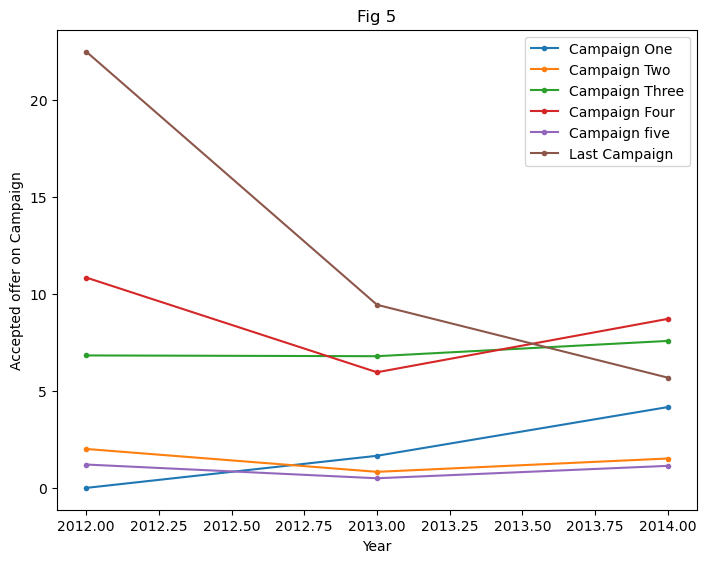

In [645]:
# iV)
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(sum_by_year_percent['Year'], sum_by_year_percent['AcceptedCmp1'],marker = '.',  label = 'Campaign One')
axes.plot(sum_by_year_percent['Year'], sum_by_year_percent['AcceptedCmp2'],marker = '.',  label = 'Campaign Two')
axes.plot(sum_by_year_percent['Year'], sum_by_year_percent['AcceptedCmp3'], marker = '.',  label = 'Campaign Three')
axes.plot(sum_by_year_percent['Year'], sum_by_year_percent['AcceptedCmp4'], marker = '.',  label = 'Campaign Four')
axes.plot(sum_by_year_percent['Year'], sum_by_year_percent['AcceptedCmp5'], marker = '.', label = 'Campaign five')
axes.plot(sum_by_year_percent['Year'], sum_by_year_percent['Response'], marker = '.',  label = 'Last Campaign')

axes.legend(loc=0)
axes.set_xlabel('Year')
axes.set_ylabel('Accepted offer on Campaign')
axes.set_title('Fig 5')

#as illustrated, out of all the people that joined over the course of the years,
# about 5% in total accepted the offer in campaign one, 3% accepted in campaign two, about 21%
#accepted in the third campaign, about 24% accepted in campaign four,approx 2% accepted in cmapaign five and
# about 36% accepted in the last campaign, making the last campaign the most successful

Text(0.5, 1.0, 'Fig 6')

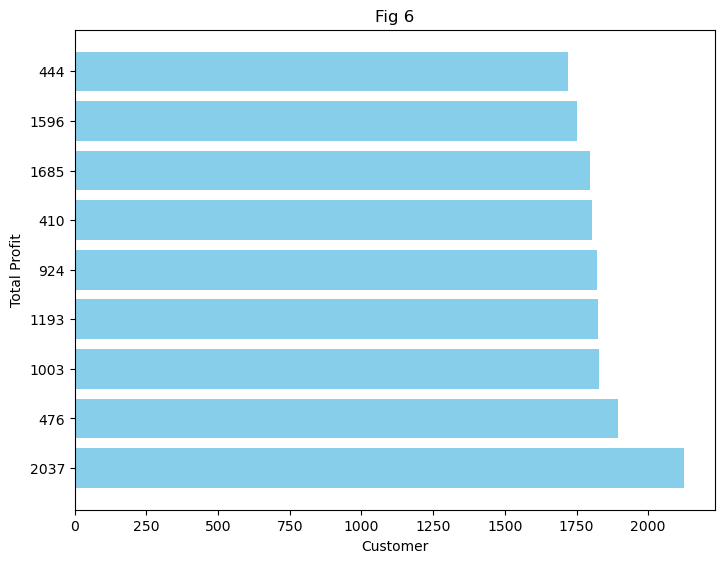

In [646]:
# v)
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.barh(top_most_profitable_customer['index'], top_most_profitable_customer['total_profit'], color='skyblue')
axes.set_xlabel('Customer')
axes.set_ylabel('Total Profit')
axes.set_title('Fig 6')
#most profitable customers and their ID

Text(0.5, 1.0, 'Fig 7')

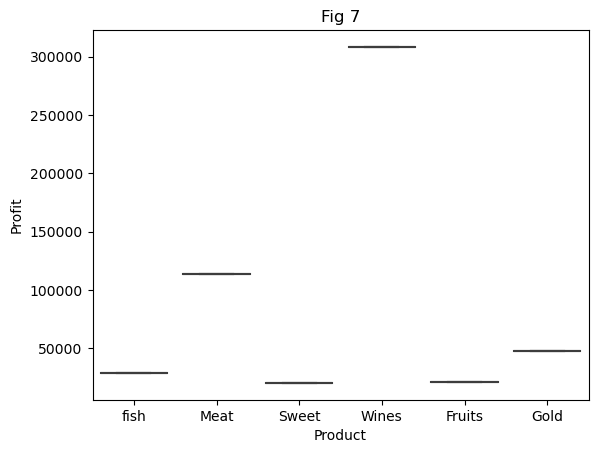

In [647]:
# vi)
product = np.array(['fish', 'Meat', 'Sweet', 'Wines', 'Fruits', 'Gold'])
profit = np.array([fish, meat, sweet, wines, fruits, gold])
product_df = pd.DataFrame({'Product': product, 'Profit': profit})

sns.boxplot(x='Product', y='Profit', data=product_df)
plt.title("Fig 7")
#as illustrated below wine is the most profitable product

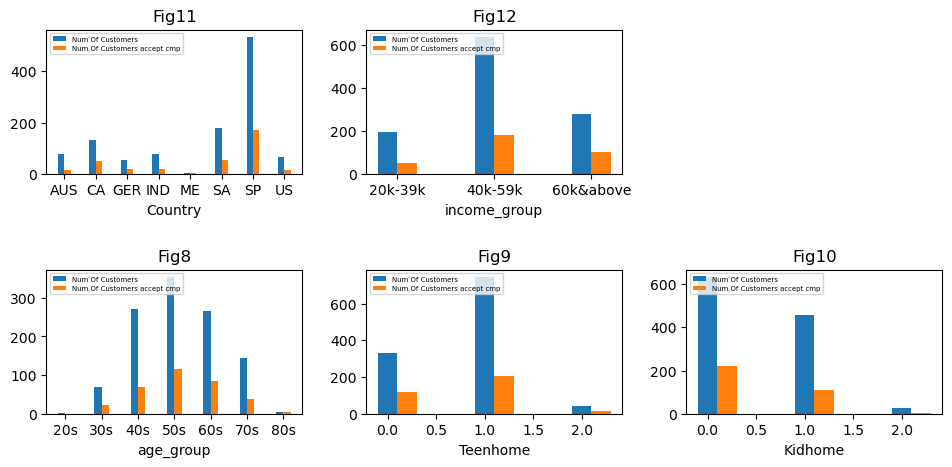

In [776]:
# vii)
fig = plt.figure()
#plotting graph to show the number of customers by age, teenhome,kidhome,country and income
# and how many of those customers interacted with campaign
def plot_bar(df,x_col, ax,fig_num):
    axes= fig.add_axes(ax)
    bar_width = 0.2
    if x_col.dtype == 'category' or x_col.dtype == 'object':
        pos1 = range(len(x_col))
        pos2 = [pos + bar_width for pos in pos1]
        axes.bar(pos1, df['Count'], width = bar_width, label="Num Of Customers")
        axes.bar(pos2, df['total_engagement'], width=bar_width, label="Num Of Customers accept cmp")
        axes.set_xticks([pos + bar_width / 2 for pos in pos1], x_col)
    else:
        axes.bar(x_col, df['Count'], width = bar_width, label="Num Of Customers")
        axes.bar(x_col+bar_width, df['total_engagement'], width=bar_width, label="Num Of Customers accept cmp")
    x_col_name =  df.columns[0]
    axes.set_xlabel(x_col_name)
    axes.set_title('Fig' +''+ fig_num)
    axes.legend(fontsize= 5, loc="upper left")
                       
        
#by AGE
plot_bar(by_age, by_age['age_group'],[0,0.5,0.4,0.3], '8')

#by Teen at home
plot_bar(by_Teenhome, by_Teenhome['Teenhome'],[0.5,0.5,0.4,0.3], '9')

#by Kids at home
plot_bar(by_Kidhome, by_Kidhome['Kidhome'],[1,0.5,0.4,0.3], '10')

#by Country
plot_bar(by_country, by_country['Country'],[0,1,0.4,0.3], '11')

#by Income
plot_bar(by_income, by_income['income_group'],[0.5,1,0.4,0.3], '12')


#From the charts we see most of their customers are in their 40's to 60's have one teenager and none or one kid, 
# makes 40-59k and are from spain,and it's no surprise that these category of people have accepted the 
# campaign offers the most considering they are most people

Text(0.5, 1.0, 'Fig 17')

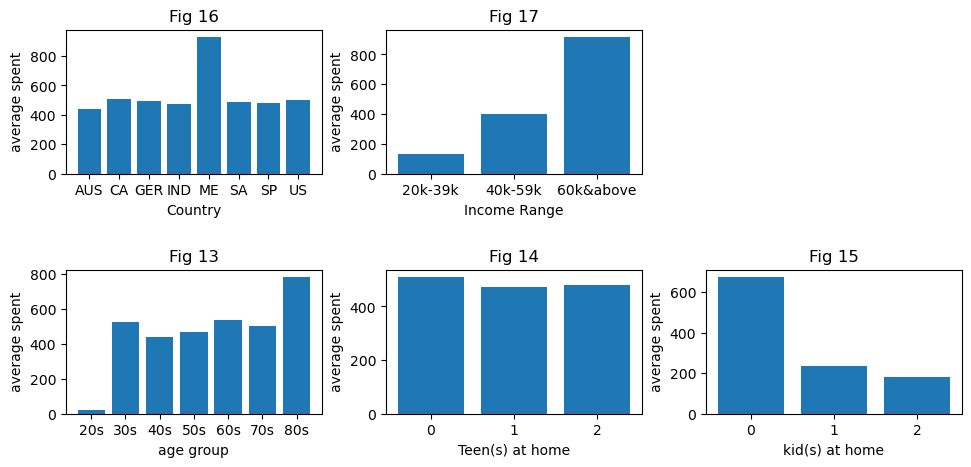

In [748]:
# viii)
fig = plt.figure()
axes1 = fig.add_axes([0,0.5,0.4,0.3])
axes1.bar(by_age['age_group'], by_age['total_profit'])
axes1.set_xlabel('age group')
axes1.set_ylabel('average spent')
axes1.set_title('Fig 13')

axes2 = fig.add_axes([0.5,0.5,0.4,0.3])
axes2.bar(by_Teenhome['Teenhome'], by_Teenhome['total_profit'])
axes2.set_xlabel('Teen(s) at home')
axes2.set_ylabel('average spent')
axes2.set_title('Fig 14')

axes3 = fig.add_axes([1,0.5,0.4,0.3])
axes3.bar(by_Kidhome['Kidhome'], by_Kidhome['total_profit'])
axes3.set_xlabel('kid(s) at home')
axes3.set_ylabel('average spent')
axes3.set_title('Fig 15')

axes4 = fig.add_axes([0,1,0.4,0.3])
axes4.bar(by_country['Country'], by_country['total_profit'])
axes4.set_xlabel('Country')
axes4.set_ylabel('average spent')
axes4.set_title('Fig 16')

axes5 = fig.add_axes([0.5,1,0.4,0.3])
axes5.bar(by_income['income_group'], by_income['total_profit'])
axes5.set_xlabel('Income Range')
axes5.set_ylabel('average spent')
axes5.set_title('Fig 17')


#irrespective of the number of customers of the different groups, we see montenegro spends the most amount on average
#and not spain, people earning 60K and above spends more on average than people earning 40K even though they are much less
#people in their 80s spend the most on average even though people in their 50's constitutes the most amount of people
#people with no teens spend most on avergae even though people with one teen constitute most of the customers and people
#with no kids gives a wide gap in amount spent on average compared to people with one kid even though their gap in their
#number is not a lot

C:\Users\DELL\AppData\Local\Temp\ipykernel_520\321071039.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[group_name] = pd.cut(filtered_df[x_col], bins=bins, labels=labels, right=False)
C:\Users\DELL\AppData\Local\Temp\ipykernel_520\321071039.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[group_name] = pd.cut(filtered_df[x_col], bins=bins, labels=labels, right=False)
C:\Users\DELL\AppData\Local\Temp\ipykernel_520\321071039.py:9: SettingWithCopyWarning: 
A value is trying to b

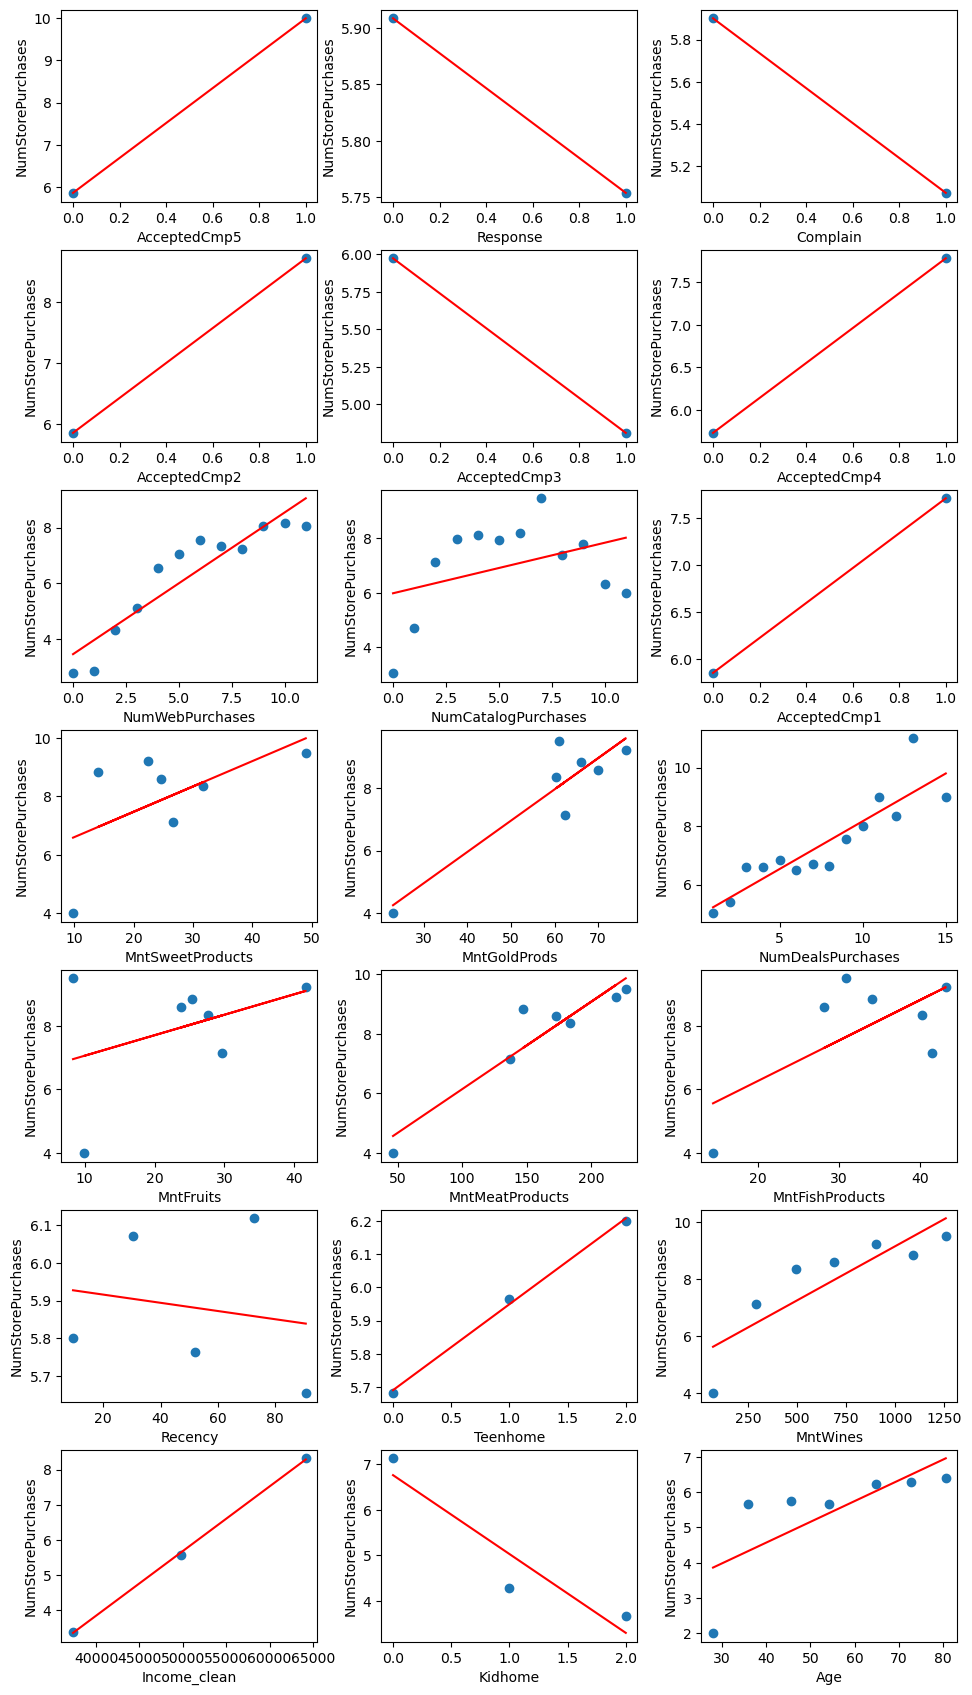

In [462]:
# SECTION TWO

#1)which factors are significantly related to the number of store purchases
fig = plt.figure()
def check_if_factor_affects(x_col, y_col, ax, bins=None, labels=None, group_name=None):
#takes in string to reference the x column in data frame, string to reference the y column
#list of axes, list of group range if called for, list of labels for different group range
#group name to give column housing the group ranges df_col_string
    if bins is not None and labels is not None and group_name is not None:
        #sections values into groups(when values are too many to plot) and groupby groups of sectioned value
        filtered_df[group_name] = pd.cut(filtered_df[x_col], bins=bins, labels=labels, right=False)
        grouped_df = filtered_df.groupby(group_name).agg({y_col:'mean', x_col:'mean' }).reset_index()
    elif bins is None and labels is None and group_name is not None:
        grouped_df = filtered_df.groupby(group_name).agg({y_col:'mean', x_col:'mean' }).reset_index()
    else:
        grouped_df = filtered_df.groupby(x_col).agg({y_col:'mean'}).reset_index() 
    #getting coefficients m and c for y=(mx + c)
    coefficients = np.polyfit(grouped_df[x_col],grouped_df[y_col], 1)
    poly = np.poly1d(coefficients)
    #returns polynomial y=mx + c and evaluates for y with respect to x i.e poly(0.5) gets the
    #value for y when x is 0.5
    axes = fig.add_axes(ax)
    axes.scatter(grouped_df[x_col], grouped_df[y_col])
    axes.plot(grouped_df[x_col], poly(grouped_df[x_col]), color='red')
    axes.set_xlabel(x_col)
    axes.set_ylabel(y_col)   
    
#NUMBER OF STORE PURCHASES VS INCOME
check_if_factor_affects('Income_clean', 'NumStorePurchases', [0.0,0.5,0.4,0.4], [20000, 40000, 60000, 80000],
                        ['20k-39k','40k-59k','60k&above'], 'income_group' )

#NUMBER OF STORE PURCHASES VS NUMBER OF KIDS HOME
check_if_factor_affects('Kidhome', 'NumStorePurchases', [0.5,0.5,0.4,0.4])

# NUMBER OF STORE PURCHASES VS AGE GROUPS
check_if_factor_affects('Age', 'NumStorePurchases', [1,0.5,0.4,0.4], group_name = 'age_group')

#RECENCY VS NUMBER OF STORE PURCHASES
check_if_factor_affects('Recency', 'NumStorePurchases', [0,1,0.4,0.4],[0,21,42,63,84,99],['0-3wks','3-6wks','>6-9wks','9-12wks','12wks+' ], group_name = 'Recency_group')

# NUMBER OF STORE PURCHASES VS TEEN AT HOME
check_if_factor_affects('Teenhome', 'NumStorePurchases', [0.5,1,0.4,0.4])

#NUMBER OF STORE PURCHASES VS AMOUNT EACH CUSTOMER SPENT ON WINE
check_if_factor_affects('MntWines', 'NumStorePurchases', [1,1,0.4,0.4],[0, 200, 400, 600, 800, 1000, 1200, 1400],
                        ['<200', '200<400', '>400<600', '>600<800', '>800<1000', '>1000<1200', '>1200'], 'amt')

#NUMBER PF STORE PURCHASES VS AMOUNT EACH CUSTOMER SPENDS ON FRUITS
check_if_factor_affects('MntFruits', 'NumStorePurchases', [0,1.5,0.4,0.4], group_name ='amt')

#NUMBER OF STORE PURCHASES VS AMOUNT EACH CUSTOMER SPENDS ON MEAT
check_if_factor_affects('MntMeatProducts', 'NumStorePurchases', [0.5,1.5,0.4,0.4], group_name ='amt')

#NUMBER OF STORE PURCHASES VS AMOUNT EACH CUSTOMER SPENDS ON FISH
check_if_factor_affects('MntFishProducts', 'NumStorePurchases', [1,1.5,0.4,0.4], group_name ='amt')

#NUMBER OF STORE PURCHASES VS AMOUNT EACH CUSTOMER SPENDS ON SWEETS
check_if_factor_affects('MntSweetProducts', 'NumStorePurchases', [0,2,0.4,0.4], group_name ='amt')

#NUMBER OF STORE PURCHASES VS AMOUNT EACH CUSTOMER SPENDS ON GOLD
check_if_factor_affects('MntGoldProds', 'NumStorePurchases', [0.5,2,0.4,0.4], group_name ='amt')

#NUMBER OF STORE PURCHASES VS NUMBER PURCHASED WITH DISCOUNT
check_if_factor_affects('NumDealsPurchases', 'NumStorePurchases', [1,2,0.4,0.4])

#NUMBER OF STORE PURCHASES VS NUMBER PURCHASED WITH WEB
check_if_factor_affects('NumWebPurchases', 'NumStorePurchases', [0,2.5,0.4,0.4])

#NUMBER OF STORE PURCHASES VS NUMBER PURCHASED WITH CATALOG
check_if_factor_affects('NumCatalogPurchases', 'NumStorePurchases', [0.5,2.5,0.4,0.4])

#NUMBER OF STORE PURCHASES VS IF CUSTOMER ACCEPTED IN THE FIRST CAMPAIGN
check_if_factor_affects('AcceptedCmp1', 'NumStorePurchases', [1,2.5,0.4,0.4])

#NUMBER OF STORE PURCHASES VS IF CUSTOMER ACCEPTED IN THE FIRST CAMPAIGN
check_if_factor_affects('AcceptedCmp2', 'NumStorePurchases', [0,3,0.4,0.4])

#NUMBER OF STORE PURCHASES VS IF CUSTOMER ACCEPTED IN THE FIRST CAMPAIGN
check_if_factor_affects('AcceptedCmp3', 'NumStorePurchases', [0.5,3,0.4,0.4])

#NUMBER OF STORE PURCHASES VS IF CUSTOMER ACCEPTED IN THE FIRST CAMPAIGN
check_if_factor_affects('AcceptedCmp4', 'NumStorePurchases', [1,3,0.4,0.4])

#NUMBER OF STORE PURCHASES VS IF CUSTOMER ACCEPTED IN THE FIRST CAMPAIGN
check_if_factor_affects('AcceptedCmp5', 'NumStorePurchases', [0,3.5,0.4,0.4])

#NUMBER OF STORE PURCHASES VS IF CUSTOMER ACCEPTED IN THE FIRST CAMPAIGN
check_if_factor_affects('Response', 'NumStorePurchases', [0.5,3.5,0.4,0.4])

#NUMBER OF STORE PURCHASES VS IF CUSTOMER COMPLAINED
check_if_factor_affects('Complain', 'NumStorePurchases', [1,3.5,0.4,0.4])

#From the charts illustrated below, we can identify the factors that are significantly(significant being the keyword)
#related to the number of purchases made in the stores. they are highlighted as follows:

#i) INCOME
# we see customers making an average of 65k purchase from the store an average of eight times which is
# double that customers making 40K, who purchases from the store an average of only four times

#ii)KIDS
# Customers without kids are twice more likely to purchase from the store than customers with kids

#iii)AGE
# an 80 year old is almost twice more likely to purchase from a store than a 20 year old

#iv)AMOUNT ON WINES
# customers that spend more on wines (over a 10000 dollars) are twice more likely 
# to buy from a store than customers who spend less(less than 250 dollars)

#v)AMOUNT ON MEAT PRODUCTS
# customers who spend more on meat products(over $200) are more than three times more likely to purchase in a store
#than a person who spends less($50 or less)

#vi) AMOUNT ON FISH PRODUCTS 
# CUSTOMERS who spend more on Fish products(over $40) ARE more than twice more likely to purchase in a store
#than CUSTOMERS who spends less($20 or less)

#viii)AMOUNT ON GOLD
# Customers who spend more on Gold(over $70) are twice more likely to purchase from the store than Customers
# who spend less($30 or less)

#ix) NUMBER OF DEALS PURCHASES
# Customers who make more purchases through discount are twice more likely to purchase from the store 
# # than Cusstomers who make less

#x)NUMBER OF WEB PURCHASES
# Customers who purchase more on the web are more than twice more likely to purchase from the store than
#Customers who purchase less

#xi)ACCEPTED CAMPAIGNS
# Customers Who accepted the offer in campaign five and campaign two purchased in a store twice more times
# than those who didn't



#The rest(Recency,Teens at home,NumCatalogPurchases,AcceptedCmp 1,3,4,last and Complaint) Were not added because
# ther wasn't a significant relation between these factors and the number of store purchases


In [365]:
#2) does the us fair more than the rest of the world in terms of purchases?

#no it doesn't and it is shown in the graph labelled fig 16 above
#Montnogero makes the most purchases


In [21]:
#3)Your supervisor insists that people who buy gold are more conservative. 
# Therefore, people who spent an above-average amount on gold in the last 2 years would have more in-store purchases.
# Justify or refute this statement using an appropriate statistical test

avg_amt = filtered_df['MntGoldProds'].mean()
ppl_above_avg = filtered_df[filtered_df['MntGoldProds']> avg_amt]
print(ppl_above_avg['NumStorePurchases'].mean())
ppl_bl_avg =  filtered_df[filtered_df['MntGoldProds']<= avg_amt]
print(ppl_bl_avg['NumStorePurchases'].mean())
# the number of store purchases for the people that buy more gold is approx 7 on average which is higher
#than customers that buy less gold which is approx 5 making the supervisor's claim true

42.96598030438675
7.457300275482094
5.140583554376658


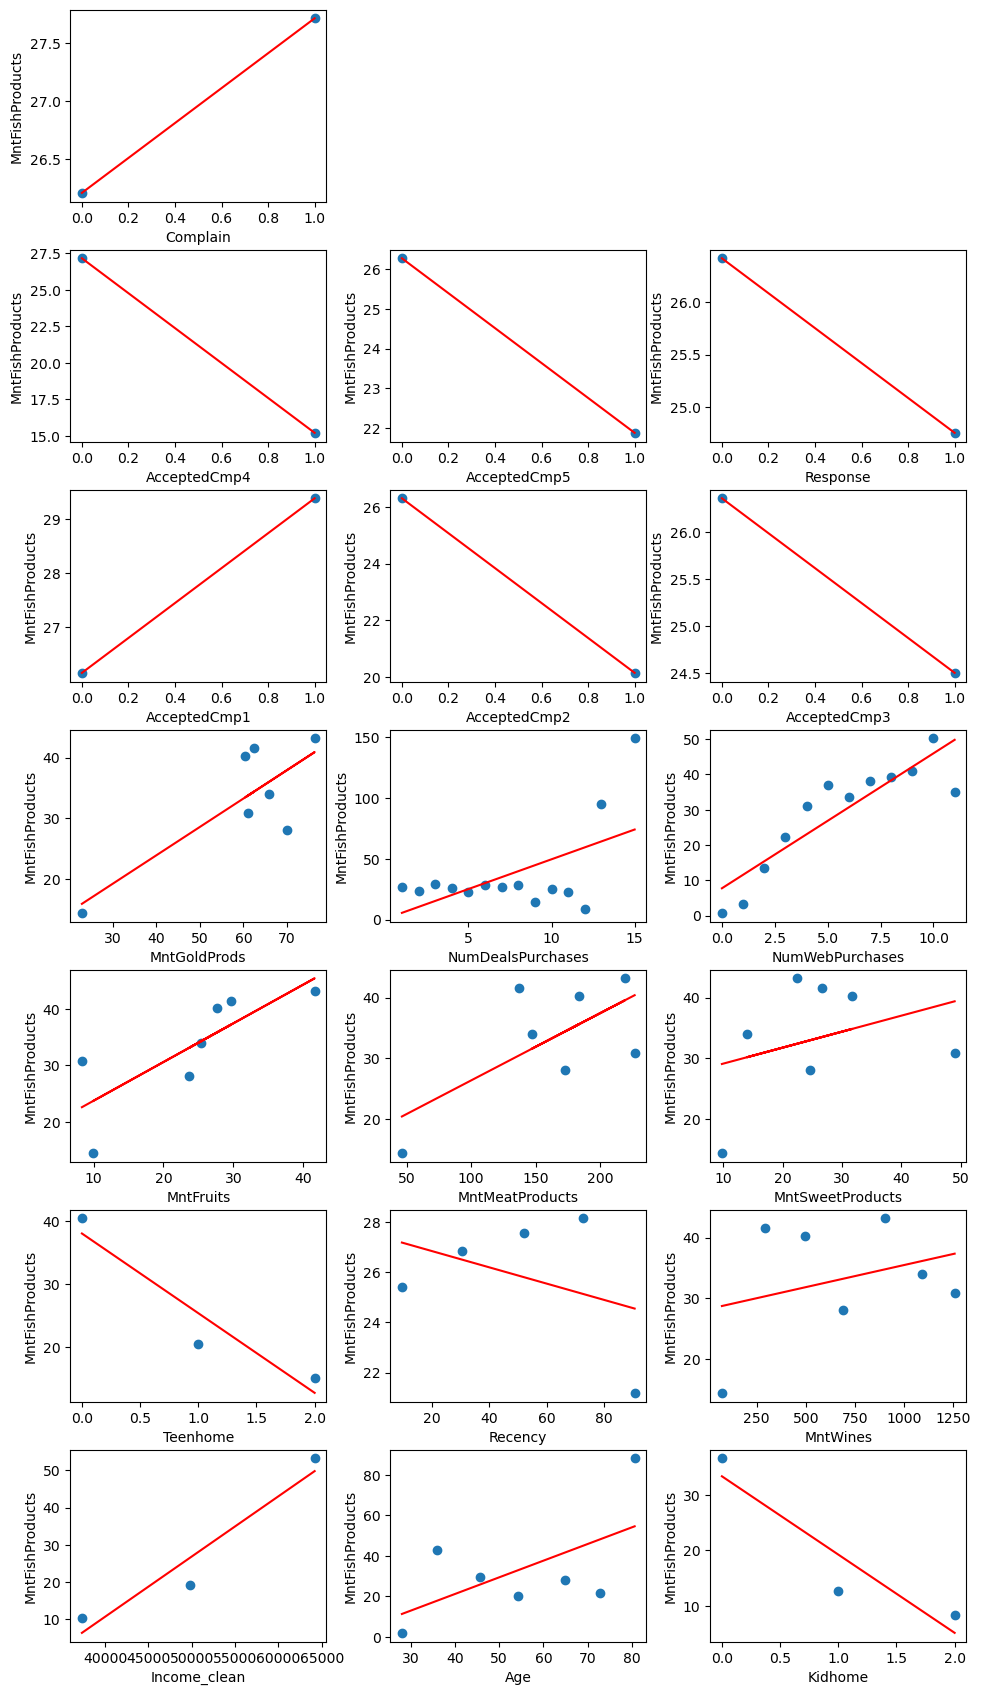

In [499]:
#4)Fish has Omega 3 fatty acids which are good for the brain. Accordingly, 
# do "Married PhD candidates" have a significant relation with the amount spent on fish? 

fig = plt.figure()
married_phd = filtered_df.groupby(['Marital_Status','Education']).agg({'MntFishProducts':'mean' })
print(married_phd)
#no, Married people with phds don't spend the most amount of money on fish

#what other factors are significantly related to the amount spent on fish

#INCOME
check_if_factor_affects('Income_clean', 'MntFishProducts',[0,0.5,0.4,0.4], group_name = 'income_group' )

#AGE GROUP
check_if_factor_affects('Age', 'MntFishProducts',[0.5,0.5,0.4,0.4], group_name = 'age_group' )

#KIDS AT HOME
check_if_factor_affects('Kidhome', 'MntFishProducts',[1,0.5,0.4,0.4])

#TEENS AT HOME
check_if_factor_affects('Teenhome', 'MntFishProducts',[0,1,0.4,0.4])

#RECENCY
check_if_factor_affects('Recency', 'MntFishProducts',[0.5,1,0.4,0.4], group_name = 'Recency_group')

#AMOUNT SPENT ON WINES
check_if_factor_affects('MntWines', 'MntFishProducts',[1,1,0.4,0.4], group_name = 'amt')

#AMOUNT SPENT ON FRUITS
check_if_factor_affects('MntFruits', 'MntFishProducts',[0,1.5,0.4,0.4], group_name = 'amt')

#AMOUNT SPENT ON MEAT
check_if_factor_affects('MntMeatProducts', 'MntFishProducts',[0.5,1.5,0.4,0.4], group_name = 'amt')

#AMOUNT SPENT ON SWEETS
check_if_factor_affects('MntSweetProducts', 'MntFishProducts',[1,1.5,0.4,0.4], group_name = 'amt')

#AMOUNT SPENT ON GOLD
check_if_factor_affects('MntGoldProds', 'MntFishProducts',[0,2,0.4,0.4], group_name = 'amt')

#NUMBER OF DEAL PURCHASES
check_if_factor_affects('NumDealsPurchases', 'MntFishProducts',[0.5,2,0.4,0.4])

#NUMBER OF WEB PURCHASES
check_if_factor_affects('NumWebPurchases', 'MntFishProducts',[1,2,0.4,0.4])

#NUMBER OF STORE PURCHASES
#shown in the previous graphs
# check_if_factor_affects('NumStorePurchases', 'MntFishProducts',[0,2.5,0.4,0.4])

#IF CUSTOMER ACCEPTS THE OFFER IN THE FIRST CAMPAIGN
check_if_factor_affects('AcceptedCmp1', 'MntFishProducts',[0,2.5,0.4,0.4])

#IF CUSTOMER ACCEPTS THE OFFER IN THE SECOND CAMPAIGN
check_if_factor_affects('AcceptedCmp2', 'MntFishProducts',[0.5,2.5,0.4,0.4])

#IF CUSTOMER ACCEPTS THE OFFER IN THE THIRD CAMPAIGN
check_if_factor_affects('AcceptedCmp3', 'MntFishProducts',[1,2.5,0.4,0.4])

#IF CUSTOMER ACCEPTS THE OFFER IN THE FOURTH CAMPAIGN
check_if_factor_affects('AcceptedCmp4', 'MntFishProducts',[0,3,0.4,0.4])

#IF CUSTOMER ACCEPTS THE OFFER IN THE FIFTH CAMPAIGN
check_if_factor_affects('AcceptedCmp5', 'MntFishProducts',[0.5,3,0.4,0.4])

#IF CUSTOMER ACCEPTS THE OFFER IN THE LAST CAMPAIGN
check_if_factor_affects('Response', 'MntFishProducts',[1,3,0.4,0.4])

#IF CUSTOMER ACCEPTS THE OFFER IN THE LAST CAMPAIGN
check_if_factor_affects('Complain', 'MntFishProducts',[0,3.5,0.4,0.4])


#From the charts illustrated below, we can identify the factors that are significantly(significant being the keyword)
#related to the amount spent on fish. they are highlighted as follows:

#i) INCOME
# we see customers making an average of 65k spend atleast $50 on Fish Products which is
# five times the customers making 40K, who spends only $10 on Fish products on average

#ii)KIDS
# Customers without kids spend over $30 on Fish Products on average which is three more than customers with kids
#who spend only $10 on Fish Products on Average

#ii)TEENS
# Customers without teens spend over $30 on Fish Products on average which is three more than customers with teens
#who spend only $10 on Fish Products on Average

#iii)AGE
# an 80 year old spends on $50 on average on fish, which is five times than what a 20 year old would spend

#iv)AMOUNT ON FRUITS
# customers that spend more on Fruits (over a 40 dollars) spend an average of $40 on Fish which is more than three times
# customers who spend less On fruits(less than 20 dollars) who spend an average of $10 on fish

#v)AMOUNT ON MEAT PRODUCTS
# customers who spend more on meat products(over $200) spend an average of $40 on Meat Product which is two times
#customers who spend less on meat products($50 or less)

#viii)AMOUNT ON GOLD
# Customers who spend more on Gold(over $70) spends an average of $40 dollars on Fish Products which is twice 
# what customers who spend less on Gold($30 or less)

#ix) NUMBER OF DEALS PURCHASES
# Customers who make more purchases through discount spend almoast a $100 on average on fish products which is almost 10
# times Cusstomers who don't purchase with discount

#x)NUMBER OF WEB PURCHASES
# Customers who purchase more (10 times on average)
# on the web spend an average of $50 on Fish Products which is five times more than Customers who purchase less(none) on the web

#xi)ACCEPTED CAMPAIGNS
# Customers Who accepted the offer in campaign four spent $28 on average on Fish Products which is almost twice more times
# those who didn't accept the offer



#The rest(Recency,Wines,Sweets, NumCatalogPurchases,AcceptedCmp 1,2,3,5,last and Complaint) Were not added because
# ther wasn't a significant relation between these factors and amount spent on fish products


In [24]:
#Is there a significant relationship between geographical regions and the success of a campaign?
# using the chi square test to measure if there is a relationship between two categorical variables or the result is 
# due to chance
#Null hypothesis: there is no relationship between them
#Alternate hypothesis: there is a relationship between them
observed = filtered_df.groupby('Country').agg({'AcceptedCmp1': 'sum', 'AcceptedCmp2': 'sum', 'AcceptedCmp3': 'sum',
                                               'AcceptedCmp4': 'sum', 'AcceptedCmp5':'sum', 'Response':'sum'})
print(observed)

#testing to see if variables have a significant relationship using the chi square test
#prints chi-test statistic and p-value
from scipy.stats import chi2_contingency
chi2, p_value, _, _ = chi2_contingency(observed)
# printing the p-value because it shows the probability of the null hypothesis being valid or invalid
# if p<0.05, it falls in the critical region where you reject the null hypothesis and accept the alternate hypothesis
print("P-value:", p_value)
#the p-value (82%) shows there's a relationship between geography and a campaign seeing that spain has the most
#engagement

         AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
Country                                                                         
AUS                 0             0             4             1             0   
CA                  3             4            11            14             3   
GER                 1             0             4             6             0   
IND                 1             0             7             4             0   
ME                  0             0             1             0             0   
SA                  2             3            12            10             2   
SP                 12             7            35            46             3   
US                  2             0             4             5             1   

         Response  
Country            
AUS             9  
CA             13  
GER             6  
IND             5  
ME              1  
SA             24  
SP             66  
US       

In [ ]:
#SECTION THREE
#1)Which marketing campaign is most successful?
#This is shown in fig 4 and fig 5 that the last campaign was most successful


In [512]:
#2)What does the average customer look like for this company?

avg_customer_data = {'Marital_Status':  [filtered_df['Marital_Status'].mode().iloc[0]],
                    'Education': [filtered_df['Education'].mode().iloc[0]],
                    'Dt_Customer': [filtered_df['Year'].mode().iloc[0]],
                    'Country':  [filtered_df['Country'].mode().iloc[0]],
                    'Age': [filtered_df['Age'].mean()],
                    'Income': [filtered_df['Income_clean'].mean()],
                    'KidHome': [filtered_df['Kidhome'].mode().iloc[0]],
                    'TeenHome': [filtered_df['Teenhome'].mode().iloc[0]],
                    'Recency': [filtered_df['Recency'].mean()],
                    'MntWines': [filtered_df['MntWines'].mean()],
                    'MntFruits': [filtered_df['MntFruits'].mean()],
                    'MntMeatProducts': [filtered_df['MntMeatProducts'].mean()],
                    'MntFishProducts': [filtered_df['MntFishProducts'].mean()],
                    'MntSweetProducts': [filtered_df['MntFishProducts'].mean()],
                    'MntGoldProducts': [filtered_df['MntGoldProds'].mean()],
                    'NumWebPurchases': [filtered_df['NumWebPurchases'].mean()],
                    'NumStorePurchases': [filtered_df['NumStorePurchases'].mean()],
                    'NumDealsPurchases': [filtered_df['NumDealsPurchases'].mean()],
                    'NumCatalogPurchases': [filtered_df['NumCatalogPurchases'].mean()],
                    'NumWebVisitsMonth': [filtered_df['NumWebVisitsMonth'].mean()],
                    'AcceptedCmp1': [filtered_df['AcceptedCmp1'].mode().iloc[0]],
                    'AcceptedCmp2': [filtered_df['AcceptedCmp2'].mode().iloc[0]],
                    'AcceptedCmp3': [filtered_df['AcceptedCmp3'].mode().iloc[0]],
                    'AcceptedCmp4': [filtered_df['AcceptedCmp4'].mode().iloc[0]],
                    'AcceptedCmp5': [filtered_df['AcceptedCmp5'].mode().iloc[0]],
                    'Response': [filtered_df['Response'].mode().iloc[0]],
                    'Complain': [filtered_df['Complain'].mode().iloc[0]]}

avg_customer = pd.DataFrame(avg_customer_data)
print(avg_customer)

#From the data we see the average customer is a 56 year old spanish graduate that is married and joined the company in 2013
#has an incone of 51k a year, no kids and 1 teenager, hasn't purchased in the last 49 days and has spent $276 on wine
#$19 on fruits, $102 on meat, $26 on fish, $26 on sweet and $43 on golds. They also have purchased on the web four times
# and visited the web 5 times, they have purchased 5 times at the store, approx 3 times with discount and 2 times with catalog
#they didn't accept any offer from the campaigns and have had 0 complaints

  Marital_Status   Education  Dt_Customer Country        Age        Income  \
0        Married  Graduation         2013      SP  56.153298  51253.470588   

   KidHome  TeenHome    Recency    MntWines  MntFruits  MntMeatProducts  \
0        0         1  49.606061  276.050802  19.033868       102.100713   

   MntFishProducts  MntSweetProducts  MntGoldProducts  NumWebPurchases  \
0        26.223708         26.223708         43.04902         4.473262   

   NumStorePurchases  NumDealsPurchases  NumCatalogPurchases  \
0           5.890374           2.909091             2.210339   

   NumWebVisitsMonth  AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  \
0           5.708556             0             0             0             0   

   AcceptedCmp5  Response  Complain  
0             0         0         0  


In [ ]:
# 3)Which products are performing best?
# as shown in fig 7, wine is the most profitable product


Text(0.5, 1.0, 'Fig 16')

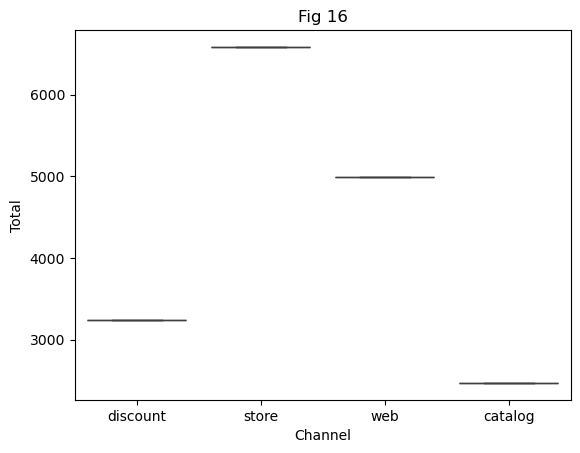

In [27]:
#4)Which channels are underperforming?
channel = np.array(['discount', 'store', 'web', 'catalog'])
total = np.array([discount, store, web, catalog])
total_df = pd.DataFrame({'Channel': channel, 'Total': total})

sns.boxplot(x='Channel', y='Total', data=total_df)
plt.title("Fig 16")
#we can see the discount and catalog channels are underperforming

In [ ]:
#SECTION FOUR

#RECOMMENDATION

#BASED ON SECTION ONE
#Fig 1 shows a constant clickthroughrate vs increase in age except with the customers in their twenties and those in 
#their 80's. One wayTo even out this disparity is to analyse what both parties have in common and personalize content 
#that resonates with both parties. Another way is to use machine learning algorithms to dynamically adjust content based on 
# user interaction

#Fig 2 where it is highlighted people with more money and less responsibility purchase more
#to solve this problem, the company can offer budget friendly options that are more affordable and cater to individuals with
# with limited disposable incomes, company can offer promotions or bundled deals to make purchasing more enticing

#Fig 3 shows most users that joined are inactive which can be solved by reaching out to churned customers with surveys and 
#feedback forms to understand reason for inactivity

#Fig 5 and 6 show the most successful campaign,this knowledge can be utilized by analysing the most successful campaign
#in terms of content, visuals, timing and targetted messaging to figure out why it's the most successful and implement
#on other campaigns.

#Fig 7 shows the most profittable customers,to improve the company through this area would be to retain and grow these valuable 
#relationships while also leveraging insights gained from them to enhance the overall business and implementing retention
#strategies to prevent churn among these customers

#Fig 8 shows the most profittable product, and this knowledge can be utilized in one of many ways including cross selling
#strategies to promote other products alongside the most profittable. packaged bundles that include the most profitabble
#product and other products at a discounted rate. training customer service to recommend complementary products based on
#customer's needs

#From fig 9 to fig 15, we see what segments majority of the customers are in and we see how much per average 
#each segment, we see the segments that spend the most are much smaller in count and the segment that spends that
#constitutes the most people don't spend that much money. getting larger less profitable groups to spend more money 
#and increasing the size of the smaller more profittable groups is a solution to this problem. one way to increase the 
#count of profitable customers is Incentivize referrals with rewards or discounts for both the referring customer 
#and the new customer. tailoring marketting to their needs. To get the larger groups to spend more money can be
#creating a sense of urgency with limited-time promotions, flash sales, or exclusive offers available only to these segments,
#exclusive access to ViP customer support and special events.


#BASED ON SECTION TWO
#From the solution of question number four, we see there is a signifcant relationship between geograhical regions and success
#of campaign. To use this knowledge in favor of the company would be to develop region-specific content and campaigns that 
#address the unique needs, interests, and challenges of customers in each location.

#BASED ON SECTION THREE
#Fig 16 shows what channels are underperforming which are catalog and discount. to improve the catalog channel there can be:
#i)Use of sppealing imagery and product demonstration to compel customers to buy more
#II)updating catalog with more prominent products and getting rid of outdated items

#to improve discount channels:
#i)analysing data to discover the most effective discount offer for different product categories and customer segments
#and identify which resonates best with the audience
#ii)Implementing a loyalty program that rewards customers for repeat purchases and engagement with discounts, points,
#or exclusive perks.
